### Task

#### С сайта https://www.renewable-ei.org/en/statistics/electricity/#demand выкачать информацию по генерации и ценам на РСВ (Рынок на Сутки Вперед; цены РСВ - колонка JEPX System price) по годам.
#### На сайте http://www.jepx.org/english/market/index.html выкачать информацию по ценам РСВ с колонки Spot Market Indices. В выкачанном файле проверить сходится ли почасовые цены РСВ с колонки «DA-24(VkWh)» с информацией с сайта https://www.renewable-ei.org/en/statistics/electricity/#demand (в случае ошибки – исправить).
#### В конце должен быть готовый скрипт по сбору информации с выше перечисленных ресурсов. На основе выкачанной информации сделать графики почасовой генерации и цен на РСВ (Matplotlib or Seaborn).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# from https://www.renewable-ei.org/en/statistics/electricity/#demand

In [3]:
data_from_renewable = pd.read_csv('files/download.csv')

In [4]:
# from http://www.jepx.org/english/market/index.html

In [5]:
data_from_jepx_2019 = pd.read_csv('files/index_2019.csv', encoding='ISO-8859-1')

In [6]:
data_from_jepx_2020 = pd.read_csv('files/index_2020.csv', encoding='ISO-8859-1')

## Concat tables from jepx

In [7]:
concat_table = pd.concat([data_from_jepx_2019, data_from_jepx_2020], axis=0)
concat_table.to_csv('files/index_2019_2020.csv')
data_from_jpex = pd.read_csv('files/index_2019_2020.csv')

In [43]:
concat_table

,Nú,DA-24(\/kWh),DA-DT(\/kWh),DA-PT(\/kWh),TTV(kWh)
0,2019/04/01,7.81,8.10,6.31,699892700
1,2019/04/02,7.79,8.08,6.30,726801550
2,2019/04/03,8.35,8.39,6.19,723656000
3,2019/04/04,7.73,7.62,5.91,730807000
4,2019/04/05,6.86,6.99,6.14,707244250
...,...,...,...,...,...
360,2021/03/27,4.38,3.61,2.69,717804950
361,2021/03/28,5.23,5.29,5.00,735331100
362,2021/03/29,4.50,4.01,2.54,781961750
363,2021/03/30,5.25,5.22,4.93,924321800


## Clean data from renewable

In [8]:
old_columns = data_from_renewable.columns.tolist()

In [9]:
new_columns = data_from_renewable.iloc[0].tolist()

In [10]:
new_columns[0] = 'Day'
new_columns[1] = 'Time'
new_columns[-1] = 'JEPX_System_Price'

In [11]:
df = data_from_renewable.rename(columns=dict(zip(old_columns, new_columns)))

In [12]:
df = df.drop(index=0, axis=0)

In [13]:
df = df.astype({'Day': 'datetime64[ns]', 'JEPX_System_Price': 'float'})

In [14]:
df.Time = pd.to_timedelta(df.Time.astype(str) + ':00')

In [15]:
df.Day = df.Day + df.Time

In [16]:
df = df.drop('Time', axis=1)

In [17]:
df.index = df.Day

In [18]:
df = df.drop('Day', axis=1)

In [19]:
int_type = {}
for column in df.columns.tolist()[0:-1]:
    int_type[column] = 'int'


In [20]:
df = df.astype(int_type)

In [21]:
df.dtypes

Nuclear                     int64
Thermal                     int64
Hydropower                  int64
Geothermal                  int64
Biomass                     int64
SolarPV                     int64
Wind                        int64
Pumped hydro(pump up)       int64
Pumped hydro(generate)      int64
Import                      int64
Export                      int64
SolarPV(curtailment)        int64
Wind(curtailment)           int64
Demand                      int64
JEPX_System_Price         float64
dtype: object

In [22]:
data_from_renewable = df

In [23]:
data_price_from_renewable = df.resample('D').JEPX_System_Price.mean().round(2)

In [24]:
data_price_from_renewable

Day
2019-12-31     6.39
2020-01-01     5.83
2020-01-02     6.06
2020-01-03     6.13
2020-01-04     6.49
              ...  
2020-12-27    26.65
2020-12-28    29.92
2020-12-29    20.94
2020-12-30    32.56
2020-12-31    29.77
Freq: D, Name: JEPX_System_Price, Length: 367, dtype: float64

## Clean data from jepx

In [25]:
old_columns = data_from_jpex.columns.tolist()

In [26]:
old_columns

['Unnamed: 0',
 '\x94N\x8c\x8e\x93ú',
 'DA-24(\\/kWh)',
 'DA-DT(\\/kWh)',
 'DA-PT(\\/kWh)',
 'TTV(kWh)']

In [27]:
df = data_from_jpex.rename(columns={'\x94N\x8c\x8e\x93ú': 'Day', 'DA-24(\/kWh)': 'DA_24'})

In [28]:
df = df.astype({'Day': 'datetime64[ns]', 'DA_24': 'float'})

In [29]:
df.index = df.Day

In [30]:
df = df.drop('Day', axis=1)

In [31]:
data_price_from_jepx = df

In [32]:
data_price_from_jepx

,Unnamed: 0,DA_24,DA-DT(\/kWh),DA-PT(\/kWh),TTV(kWh)
Day,,,,,
2019-04-01,0,7.81,8.10,6.31,699892700
2019-04-02,1,7.79,8.08,6.30,726801550
2019-04-03,2,8.35,8.39,6.19,723656000
2019-04-04,3,7.73,7.62,5.91,730807000
2019-04-05,4,6.86,6.99,6.14,707244250
...,...,...,...,...,...
2021-03-27,360,4.38,3.61,2.69,717804950
2021-03-28,361,5.23,5.29,5.00,735331100
2021-03-29,362,4.50,4.01,2.54,781961750


## Compare 'data_price_from_renewable' with 'data_price_from_jepx'

In [33]:
for index in data_price_from_jepx.index:
    if not index in data_price_from_renewable.index:
        data_price_from_jepx = data_price_from_jepx.drop(index, axis=0)

In [44]:
data_price_from_jepx.index

DatetimeIndex(['2019-12-31', '2020-01-01', '2020-01-02', '2020-01-03',
               '2020-01-04', '2020-01-05', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='Day', length=367, freq=None)

In [35]:
price_from_jepx = data_price_from_jepx[['DA_24']]

In [36]:
price_from_jepx

,DA_24
Day,
2019-12-31,5.82
2020-01-01,5.97
2020-01-02,5.97
2020-01-03,6.13
2020-01-04,6.40
...,...
2020-12-27,25.84
2020-12-28,30.82
2020-12-29,20.17


In [42]:
data_price_from_renewable

Day
2019-12-31     6.39
2020-01-01     5.83
2020-01-02     6.06
2020-01-03     6.13
2020-01-04     6.49
              ...  
2020-12-27    26.65
2020-12-28    29.92
2020-12-29    20.94
2020-12-30    32.56
2020-12-31    29.77
Freq: D, Name: JEPX_System_Price, Length: 367, dtype: float64

In [41]:
data_price_from_jepx['DA_24']

Day
2019-12-31     5.82
2020-01-01     5.97
2020-01-02     5.97
2020-01-03     6.13
2020-01-04     6.40
              ...  
2020-12-27    25.84
2020-12-28    30.82
2020-12-29    20.17
2020-12-30    29.38
2020-12-31    28.69
Name: DA_24, Length: 367, dtype: float64

In [37]:
data_price_from_jepx['match'] = np.where(data_price_from_jepx['DA_24'] == data_price_from_renewable,  \
                                         'True', data_price_from_jepx['DA_24'])

In [38]:
data_price_from_jepx

,Unnamed: 0,DA_24,DA-DT(\/kWh),DA-PT(\/kWh),TTV(kWh),match
Day,,,,,,
2019-12-31,274,5.82,5.92,4.51,728534550,5.82
2020-01-01,275,5.97,5.63,4.44,719697750,5.97
2020-01-02,276,5.97,5.87,4.54,715588650,5.97
2020-01-03,277,6.13,5.99,4.56,724015750,True
2020-01-04,278,6.40,6.41,4.73,739357900,6.4
...,...,...,...,...,...,...
2020-12-27,270,25.84,32.77,11.50,792377050,25.84
2020-12-28,271,30.82,37.71,19.22,870232050,30.82
2020-12-29,272,20.17,22.40,8.86,848890350,20.17


### Build Charts

In [39]:
df = data_from_renewable[['Nuclear', 'Thermal', 'Hydropower', 'Geothermal', 'Biomass', 'SolarPV', 'Wind']]

<AxesSubplot:xlabel='Day'>

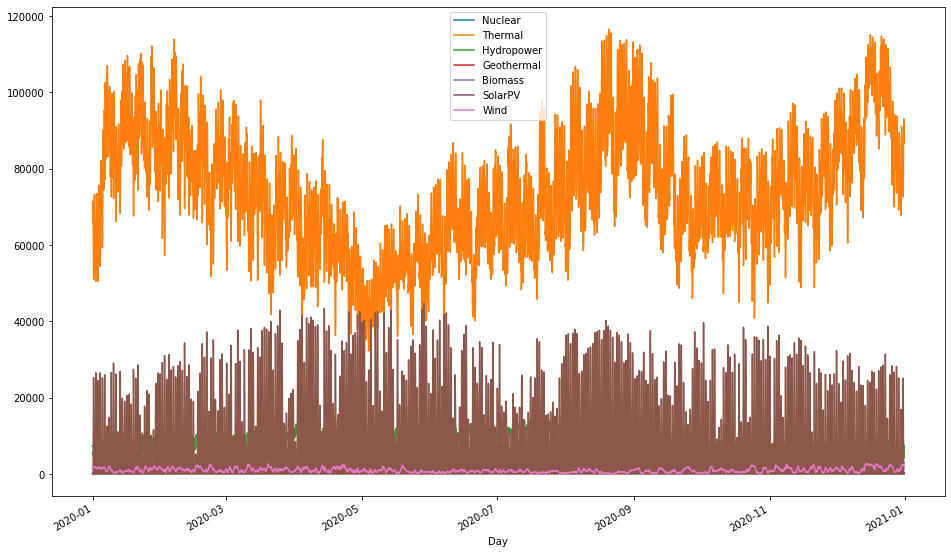

In [40]:
df.plot(figsize=(16, 10))